In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import curveball
print("Curveball", curveball.__version__)
sns.set(style='white')

Curveball 0.2.5


In [2]:
plate = pd.read_csv(r'W-WB-B - confusion.csv')
df = curveball.ioutils.read_tecan_xlsx("Dana_WB_150816.xlsx", plate=plate, max_time=14)

df = df[(df.Well != 'A6')]
df = df[(df.Well != 'E11')]

df_regular = df[(df.Row != 'E') & (df.Row != 'F') & (df.Row != 'G') & (df.Row != 'H')]
df_with1h = df[(df.Row != 'A') & (df.Row != 'B') & (df.Row != 'C') & (df.Row != 'D')] 

C:\Anaconda3\lib\site-packages\curveball\ioutils.py:223: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df.sort([u'Row', u'Col', u'Time'], inplace=True)
C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  na_position=na_position)


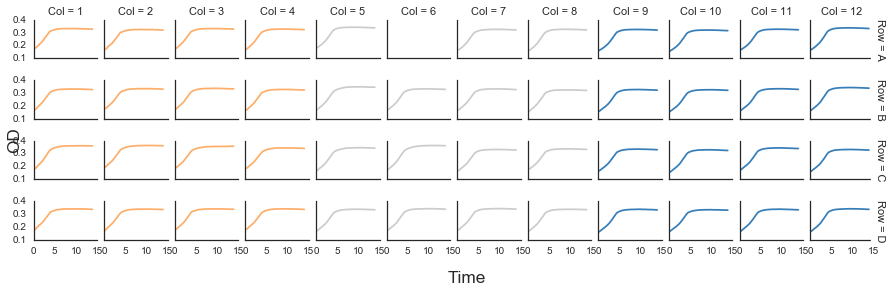

In [3]:
curveball.plots.plot_wells(df_regular)

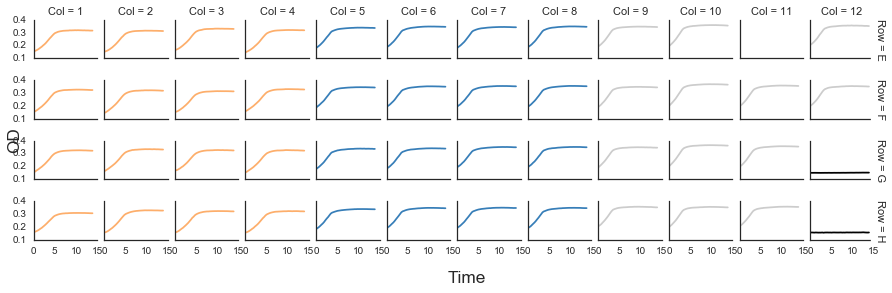

In [4]:
curveball.plots.plot_wells(df_with1h)

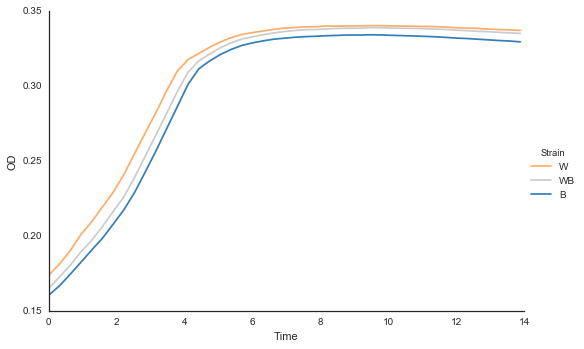

In [5]:
curveball.plots.plot_strains(df_regular)

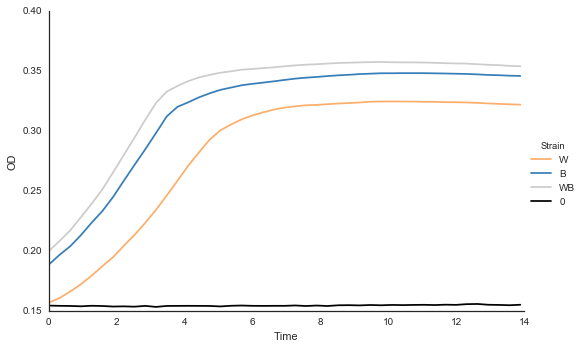

In [6]:
curveball.plots.plot_strains(df_with1h)

[[Model]]
    Model(RichardsLag1)
[[Fit Statistics]]
    # function evals   = 107
    # data points      = 720
    # variables        = 5
    chi-square         = 0.071
    reduced chi-square = 0.000
    Akaike info crit   = -6627.062
    Bayesian info crit = -6604.166
[[Variables]]
    y0:   0.17527549 +/- 0.001933 (1.10%) (init= 0.1738437)
    K:    0.33910034 +/- 0.000509 (0.15%) (init= 0.3371625)
    r:    0.48353659 +/- 0.184275 (38.11%) (init= 0.6667584)
    nu:   3.66188017 +/- 2.071831 (56.58%) (init= 1)
    q0:   0.34331314 +/- 0.185154 (53.93%) (init= 0.2784095)



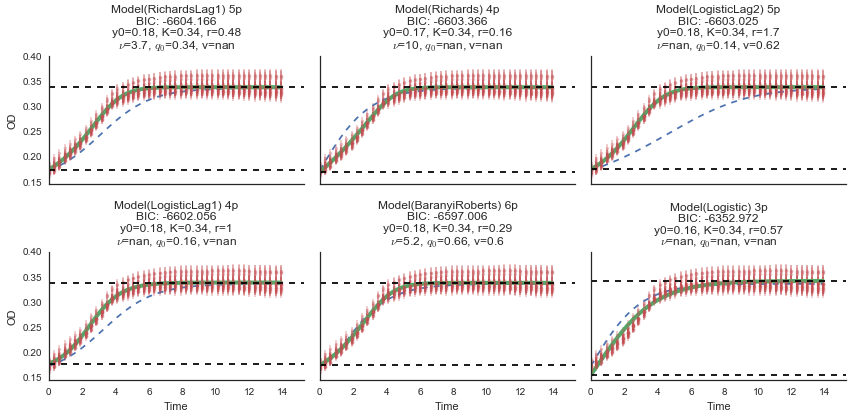

In [7]:
modelW_regular = curveball.models.fit_model(df_regular[df_regular.Strain=='W'])[0][0]

[[Model]]
    Model(RichardsLag1)
[[Fit Statistics]]
    # function evals   = 110
    # data points      = 720
    # variables        = 5
    chi-square         = 0.028
    reduced chi-square = 0.000
    Akaike info crit   = -7292.507
    Bayesian info crit = -7269.611
[[Variables]]
    y0:   0.15690840 +/- 0.001096 (0.70%) (init= 0.1566687)
    K:    0.32352533 +/- 0.000354 (0.11%) (init= 0.3220375)
    r:    0.47926566 +/- 0.077611 (16.19%) (init= 0.4306492)
    nu:   3.10942040 +/- 0.833758 (26.81%) (init= 1)
    q0:   0.23993857 +/- 0.055762 (23.24%) (init= 0.1014912)



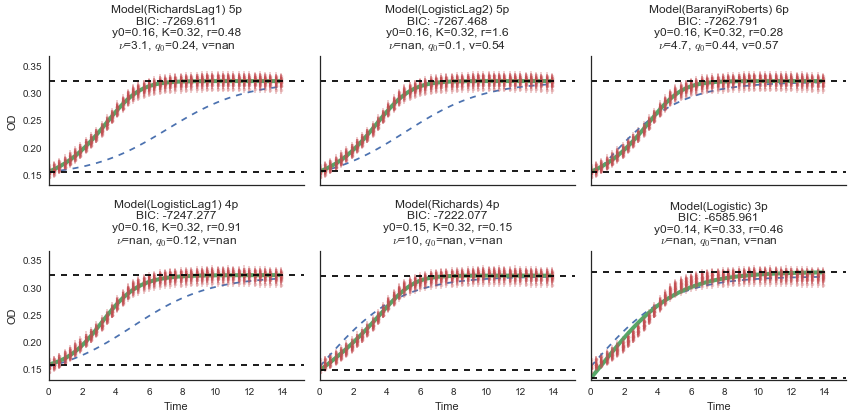

In [8]:
# supposed to be the same
modelW_with1h = curveball.models.fit_model(df_with1h[df_with1h.Strain=='W'])[0][0]

[[Model]]
    Model(RichardsLag1)
[[Fit Statistics]]
    # function evals   = 138
    # data points      = 720
    # variables        = 5
    chi-square         = 0.030
    reduced chi-square = 0.000
    Akaike info crit   = -7256.384
    Bayesian info crit = -7233.488
[[Variables]]
    y0:   0.16204699 +/- 0.001158 (0.71%) (init= 0.1604375)
    K:    0.33240777 +/- 0.000324 (0.10%) (init= 0.32955)
    r:    0.41078271 +/- 0.064068 (15.60%) (init= 0.6587145)
    nu:   5.87026182 +/- 1.353143 (23.05%) (init= 1)
    q0:   0.32907168 +/- 0.100384 (30.51%) (init= 0.1833556)



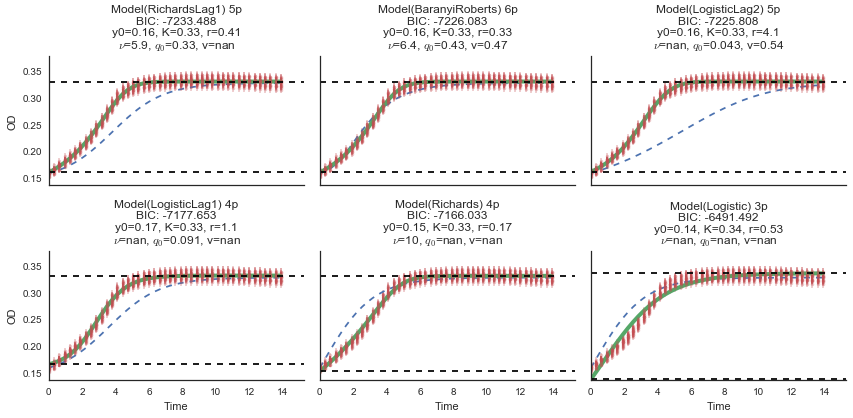

In [9]:
modelB_regular = curveball.models.fit_model(df_regular[df_regular.Strain=='B'])[0][0]

[[Model]]
    Model(LogisticLag1)
[[Fit Statistics]]
    # function evals   = 38
    # data points      = 720
    # variables        = 4
    chi-square         = 0.023
    reduced chi-square = 0.000
    Akaike info crit   = -7432.985
    Bayesian info crit = -7414.668
[[Variables]]
    y0:   0.18976649 +/- 0.000958 (0.51%) (init= 0.1885938)
    K:    0.34670069 +/- 0.000296 (0.09%) (init= 0.3459813)
    r:    0.95346427 +/- 0.020227 (2.12%) (init= 0.6158454)
    q0:   0.25989153 +/- 0.023011 (8.85%) (init= 0.3180382)



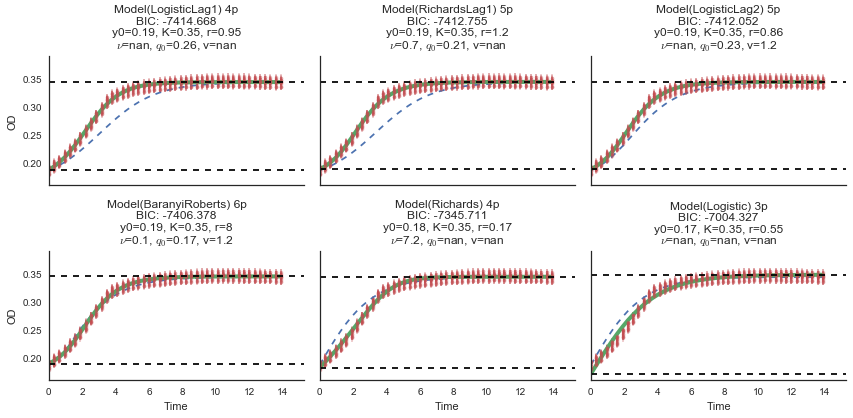

In [10]:
modelB_with1h = curveball.models.fit_model(df_with1h[df_with1h.Strain=='B'])[0][0]

(0, 14)

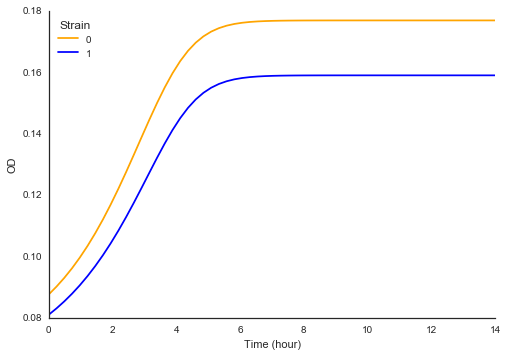

In [11]:
t_reg, y_reg, fig,ax = curveball.competitions.compete(modelW_regular, modelB_regular, PLOT=True, colors=['orange', 'blue'])
plt.xlim(0,14)

(0, 14)

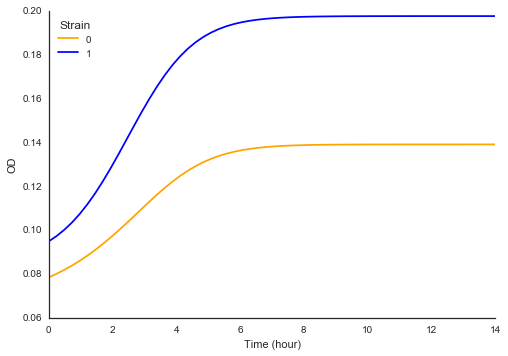

In [12]:
t_1h ,y_1h ,fig,ax = curveball.competitions.compete(modelW_with1h, modelB_with1h, PLOT=True, colors=['orange', 'blue'])
plt.xlim(0,14)

C:\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


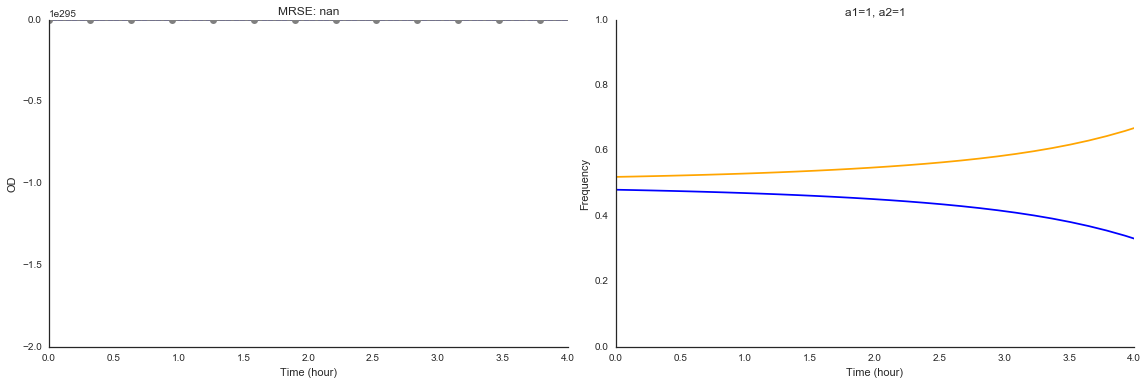

In [23]:
ode = curveball.competitions.baranyi_roberts_yr2
curveball.competitions.fit_and_compete(modelW_regular, modelB_regular, df_regular[df_regular.Strain=='WB'], ode=ode, colors=['orange', 'blue', 'grey'],PLOT=True);
plt.xlim(0,4)

plt.savefig('frequencies - no pre growth.png')

C:\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


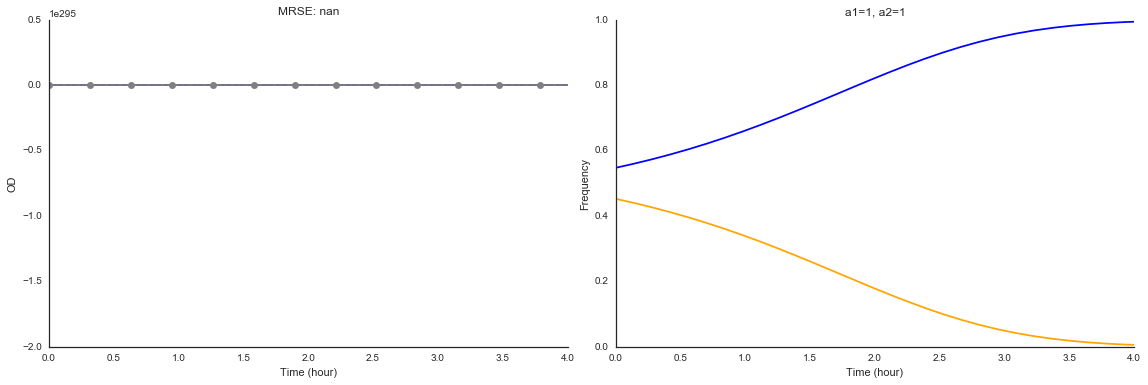

In [24]:
ode = curveball.competitions.baranyi_roberts_yr2
curveball.competitions.fit_and_compete(modelW_with1h, modelB_with1h, df_with1h[df_with1h.Strain=='WB'], ode=ode, colors=['orange', 'blue', 'grey'],PLOT=True);
plt.xlim(0,4)

plt.savefig('frequencies - 1 hour pre growth.png')

In [13]:
print('regular -')
print('White strain:')
print('μ', curveball.models.find_max_growth(modelW_regular)[-1])
#print('λ', curveball.models.find_lag(modelW_regular))
print('λ', curveball.baranyi_roberts_model.lag(modelW_regular), '\n')
print('Blue strain:')
print('μ', curveball.models.find_max_growth(modelB_regular)[-1])
#print('λ', curveball.models.find_lag(modelB_regular))
print('λ', curveball.baranyi_roberts_model.lag(modelB_regular))

regular -
White strain:
μ 0.163902573923
λ 2.82140251711 

Blue strain:
μ 0.169721012404
λ 3.3982938841


In [14]:
print('with 1h -')
print('White strain:')
print('μ', curveball.models.find_max_growth(modelW_with1h)[-1])
#print('λ', curveball.models.find_lag(modelW_with1h))
print('λ', curveball.baranyi_roberts_model.lag(modelW_with1h), '\n')
print('Blue strain:')
print('μ', curveball.models.find_max_growth(modelB_with1h)[-1])
#print('λ', curveball.models.find_lag(modelB_with1h))
print('λ', curveball.baranyi_roberts_model.lag(modelB_with1h))

with 1h -
White strain:
μ 0.152504900857
λ 3.4269807156 

Blue strain:
μ 0.15768710869
λ 1.65555917956


## selection

In [15]:
def s(y_competition):
    rel_fit = (np.log(y_1h[0][1][0]) - np.log(y_1h[-1][1][0]))/(np.log(y_1h[0][0][0]) - np.log(y_1h[-1][0][0]))
    return (rel_fit-1)

In [16]:
s_coef = s(y_1h)
s_coef

0.281188360005312